In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(500, 2)

In [4]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [5]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [8]:
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [9]:
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [11]:
# Variável preditora
df['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

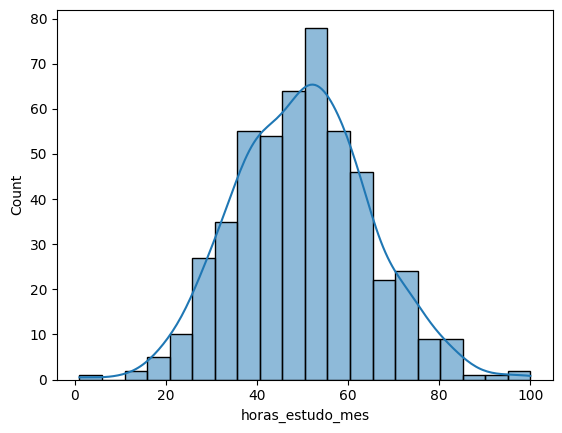

In [12]:
# Histograma da variável preditora
sns.histplot(data = df, x = 'horas_estudo_mes', kde = True)

## Preparando os dados

X = Variável de entrada
Y = Variável de Saída

In [13]:
x = np.array(df['horas_estudo_mes'])

type(x)

numpy.ndarray

In [14]:
# Preparando a variável alvo
x = x.reshape(-1, 1)

In [15]:
# Preparando a variável y
y = df['salario']

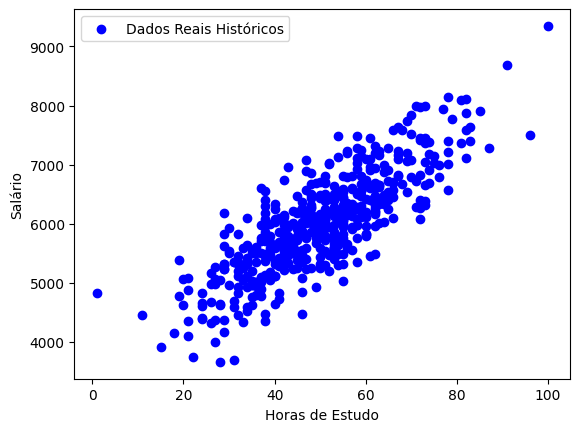

In [16]:
# Gráfico de dispersão entre X e y
plt.scatter(x, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [17]:
# Dividir dados em treinamento e teste
# O treino é para treinar, o teste é para verificar com outra massa de dados se realmente aprendeu
# test_size é a proporção, 20% dos dados vão para teste, e 80% para treiono
# random_state = 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_treino.shape

(400, 1)

In [19]:
x_teste.shape

(100, 1)

In [20]:
y_teste.shape

(100,)

In [21]:
y_treino.shape

(400,)

## Modelagem Preditiva (Machine Learning)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [23]:
#  Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [24]:
modelo.fit(x_treino, y_treino)

LinearRegression()

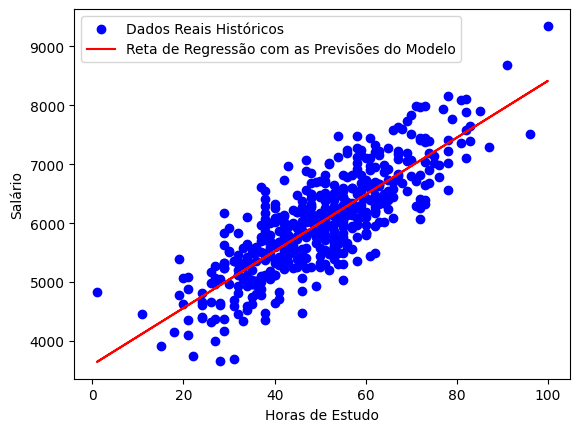

In [25]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(x, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(x, modelo.predict(x), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [31]:
# Avalia o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [28]:
# Intercepto - parâmetro w0
modelo.intercept_


3596.7837243727527

In [29]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])